## 4.1 팬더스로 상장법인 목록 읽기
맥에서 xml 파일을 다운받으니 오류가 나서 윈도우에서 다운받음. 

In [1]:
import pandas as pd
krx_list = pd.read_html('./상장법인목록.xls')
#df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?methood=download&searchType=13')[0]
df = krx_list[0]
df['종목코드'] = df['종목코드'].map('{:06d}'.format)
df = df.sort_values(by='종목코드')
df


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
2317,동화약품,000020,의약품 제조업,"의약품 제조,판매,수출입",1976-03-24,12월,박기환,http://www.dong-wha.co.kr,서울특별시
2309,KR모터스,000040,그외 기타 운송장비 제조업,"이륜차(오토바이) 제조,도매",1976-05-25,12월,이기복,http://www.krmotors.com,경상남도
2408,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2407,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2399,삼양홀딩스,000070,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,윤재엽,http://www.samyang.com,서울특별시
...,...,...,...,...,...,...,...,...,...
385,코오롱티슈진,950160,기초 의약물질 및 생물학적 제제 제조업,골관절염 치료제,2017-11-06,12월,"노문종, 한성수",http://tissuegene.com,미국
345,JTC,950170,종합 소매업,"식품류, 생활용품류, 화장품류 (사후면세업)",2018-04-06,02월,구철모,http://www.groupjtc.com/korean/,일본
221,SNK,950180,소프트웨어 개발 및 공급업,"IP 라이센스, 콘솔, 모바일 게임",2019-05-07,07월,갈지휘,http://www.snk-corp.co.jp,일본
57,미투젠,950190,소프트웨어 개발 및 공급업,"캐주얼게임, 소셜카지노게임",2020-08-18,12월,린즈웨이/라우호밍,http://www.me2zen.com,홍콩


## 4.3 웹에서 일별 시세 구하기
네이버 금융에 접속하여 한국거래소에 상장된 종목의 일별 시세 확인하기

1. https://finance.naver.com/item/sise.nhn?code=068270

셀트리온 일별 시세에서 '맨뒤 클릭' 후 마우스 오른쪽 버튼, copy link address 누르기.

https://finance.naver.com/item/sise_day.nhn?code=068270&page=383

## 4.4 뷰티풀 수프로 일별 시세 읽어오기
뷰티풀 수프 : html, xml 페이지로부터 데이터를 추출하는 파이썬 라이브러리로, 웹 스크레이퍼.

이름의 유래 : 구조적으로 잘못된 태그들로 구성된 HTML을 일컫는 용어인 태그 수프(Tag Soup)에서 유래. 

뷰티풀 수프는 내부적으로 HTML을 XML 형태의 파이썬 형태의 객체로 변환해서 처리하기 때문에 구조적으로 잘못된 HTML도 문제 없이 분석 가능.



### 4.4.3 맨 뒤 페이지 숫자 구하기

In [3]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import pandas as pd

# 값을 못읽어와서 문제를 해결해줌.
url = "https://finance.naver.com/item/sise_day.nhn?code=068270&amp;page=1"
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_1_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'}
res = requests.get(url, verify=True, headers=headers)


with urlopen(url) as doc:
    html = BeautifulSoup(res.text, 'lxml') # 파싱방법 : lxml
    pgrr = html.find('td', class_='pgRR') # pgRR은 pageRightRight을 의미
    #print(pgrr.a['href']) # /item/sise_day.nhn?code=068270&amp;page=1&page=383
    #print(pgrr.prettify()) # pgrr의 getText 속성값을 계층적으로 보기 좋게 출력
    #print(pgrr.text) # 맨뒤
    s = str(pgrr.a['href']).split('=')
    # s = str(pgrr.a['href'].split('='))
    # last_page = s[-2:-5]
    last_page = s[-1]
    #print(last_page)



### 4.4.4. 전체 페이지 읽어오기
위에 이어서 계속

책에 나온대로 한건데..오류 나오는 코드 (Value error: Table not found)

In [ ]:
df = pd.DataFrame()
sise_url = 'http://finance.naver.com/item/sise_day.nhn?code=068270'


for page in range(1, int(last_page)+1): 
    page_url = '{}&page={}'.format(sise_url, page)
    df = df.append(pd.read_html(page_url, encoding='euc-kr', header='0')[0]) # 한글 깨짐 현상이 있어서 여기에다 인코딩 설정
# {}에는 format()의 인자가 하나씩 들어가고, &은 그냥 {}과 뒤의 문자열을 연결한다는 형식상의 기호이다. 즉 'page=' 앞뒤로 sise_url, page가 순서대로 들어가게 된다.

df = df.dropna() # 값이 빠진 행을 제거한다.
print(df)


## Stack overflow

In [13]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import pandas as pd

url = "https://finance.naver.com/item/sise_day.nhn?code=068270&amp;page=1"
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_1_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'}
res = requests.get(url, verify=True, headers=headers)


with urlopen(url) as doc:
    html = BeautifulSoup(res.text, 'lxml') 
    pgrr = html.find('td', class_='pgRR') 
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]


df = pd.DataFrame()
sise_url = 'http://finance.naver.com/item/sise_day.nhn?code=068270'

for page in range(1, int(last_page)+1): 
    page_url = '{}&page={}'.format(sise_url, page)  
    res = requests.get(page_url, verify=True, headers=headers)
    df = df.append(pd.read_html(res.text, encoding='euc-kr')[0])

df = df.dropna()
print(df)

            날짜        종가      전일비        시가        고가        저가        거래량
1   2021.01.14  352500.0  29000.0  366000.0  374000.0  351000.0  3368213.0
2   2021.01.13  381500.0   2500.0  380000.0  390000.0  375000.0  2083610.0
3   2021.01.12  384000.0  10000.0  380500.0  387000.0  370000.0  2475166.0
4   2021.01.11  374000.0   7000.0  377000.0  386500.0  367000.0  2624781.0
5   2021.01.08  367000.0   9500.0  359500.0  370000.0  356000.0  1719926.0
..         ...       ...      ...       ...       ...       ...        ...
11  2005.07.25    5650.0     70.0    5500.0    5950.0    5500.0    61036.0
12  2005.07.22    5580.0    160.0    5850.0    5850.0    5530.0    69921.0
13  2005.07.21    5740.0    810.0    6450.0    6580.0    5730.0   182685.0
1   2005.07.20    6550.0   1150.0    7690.0    7690.0    6550.0   422688.0
2   2005.07.19    7700.0   2500.0    6700.0    7700.0    6510.0   499088.0

[3832 rows x 7 columns]


## 4.5.1 OHLC 차트와 캔들 차트의 비교

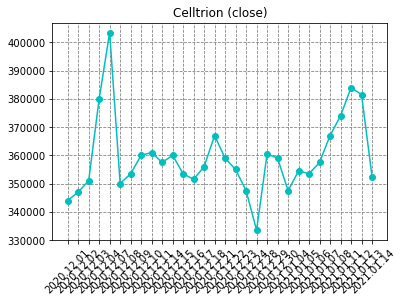

In [15]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import pandas as pd

url = "https://finance.naver.com/item/sise_day.nhn?code=068270&amp;page=1"
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_1_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'}
res = requests.get(url, verify=True, headers=headers)


with urlopen(url) as doc:
    html = BeautifulSoup(res.text, 'lxml') 
    pgrr = html.find('td', class_='pgRR') 
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]


df = pd.DataFrame()
sise_url = 'http://finance.naver.com/item/sise_day.nhn?code=068270'

for page in range(1, int(last_page)+1): 
    page_url = '{}&page={}'.format(sise_url, page)  
    res = requests.get(page_url, verify=True, headers=headers)
    df = df.append(pd.read_html(res.text, encoding='euc-kr')[0])

# 4.5.2 셀트리온 종가 차트(here!)
df = df.dropna()
df = df.iloc[0:30] # 최근 데이터 30행만 사용
df = df.sort_values(by ='날짜') # 네이버 금융 데이터가 내림차순이라서 오름차순으로 변경

# 날짜, 종가 칼럼으로 차트 그리기
plt.title("Celltrion (close)")
plt.xticks(rotation = 45) # x축 레이블의 날짜가 겹쳐있어 보기 어려우므로 45도 회전하여 표시
plt.plot(df['날짜'], df['종가'], 'co-') # x축은 날짜 데이터로, y축은 종가 데이터로 출력한다. co는 좌표를 cyan 원으로, -는 각 좌표를 실선으로 연결해서 표시하라는 의미
plt.grid(color = 'gray', linestyle = '--')
plt.show()

## 셀트리온 캔들 차트

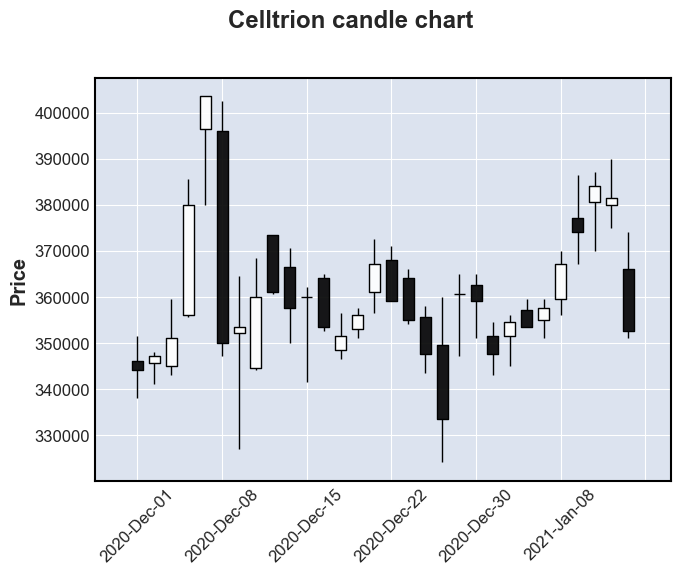

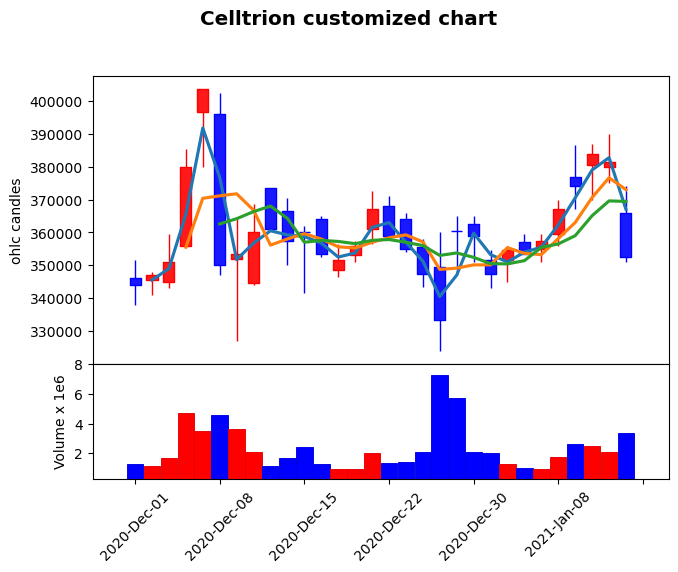

In [6]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import mplfinance as mpf
import requests

url = "https://finance.naver.com/item/sise_day.nhn?code=068270&amp;page=1"
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_1_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'}
res = requests.get(url, verify=True, headers=headers)

with urlopen(url) as doc:
    html = BeautifulSoup(res.text, 'lxml') 
    pgrr = html.find('td', class_='pgRR') 
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]

df = pd.DataFrame()
sise_url = 'http://finance.naver.com/item/sise_day.nhn?code=068270'

for page in range(1, int(last_page)+1): 
    page_url = '{}&page={}'.format(sise_url, page)  
    res = requests.get(page_url, verify=True, headers=headers)
    df = df.append(pd.read_html(res.text, encoding='euc-kr')[0])

df = df.dropna()
df = df.iloc[0:30]
df = df.rename(columns = {'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
df = df.sort_values(by ='Date')
df.index = pd.to_datetime(df.Date) #  Date 칼럼을 DateTimeIndex형으로 변경 후 인덱스로 설정
df = df[['Open','High','Low','Close','Volume']]

# mpl finance로 캔들 차트 그리기
mpf.plot(df, title = 'Celltrion candle chart', type = 'candle') # type = 'ohlc' is default
plt.show()

kwargs = dict(title = 'Celltrion customized chart', type = 'candle', mav = (2,4,6), volume = True, ylabel = 'ohlc candles')
mc = mpf.make_marketcolors(up = 'r', down = 'b', inherit  = True)
s = mpf.make_mpf_style(marketcolors = mc)
mpf.plot(df, **kwargs, style = s)
plt.show()